# SKOLTECH, Experimental Data Processing

## Evgenii Safronov, Mikhail Kurenkov, Taras Melnik

In [39]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from numpy.linalg import inv
import matplotlib as mplb
from matplotlib.font_manager import FontProperties
%matplotlib inline
from numpy.random import normal
mplb.rc('xtick', labelsize=5) 
mplb.rc('ytick', labelsize=5) 

# PART 1

## Generating 

In [40]:
N = 3000
sigma_w = np.array([0,8**0.5])  #[0] refers to experimentally determined value,
                                #[1] to assigned by us
sigma_n = np.array([0,16**0.5])
w = normal(0, sigma_w[1], N)
n = normal(0, sigma_n[1], N)
window = np.tril(np.ones((N,N)))    #here we build a matrix to easily calc 
                                    #sum from 0 to n w_i
X_0 = 10

In [41]:
X = np.ones_like(w)*10 + w.dot(window) #use of matrix
z = X + n

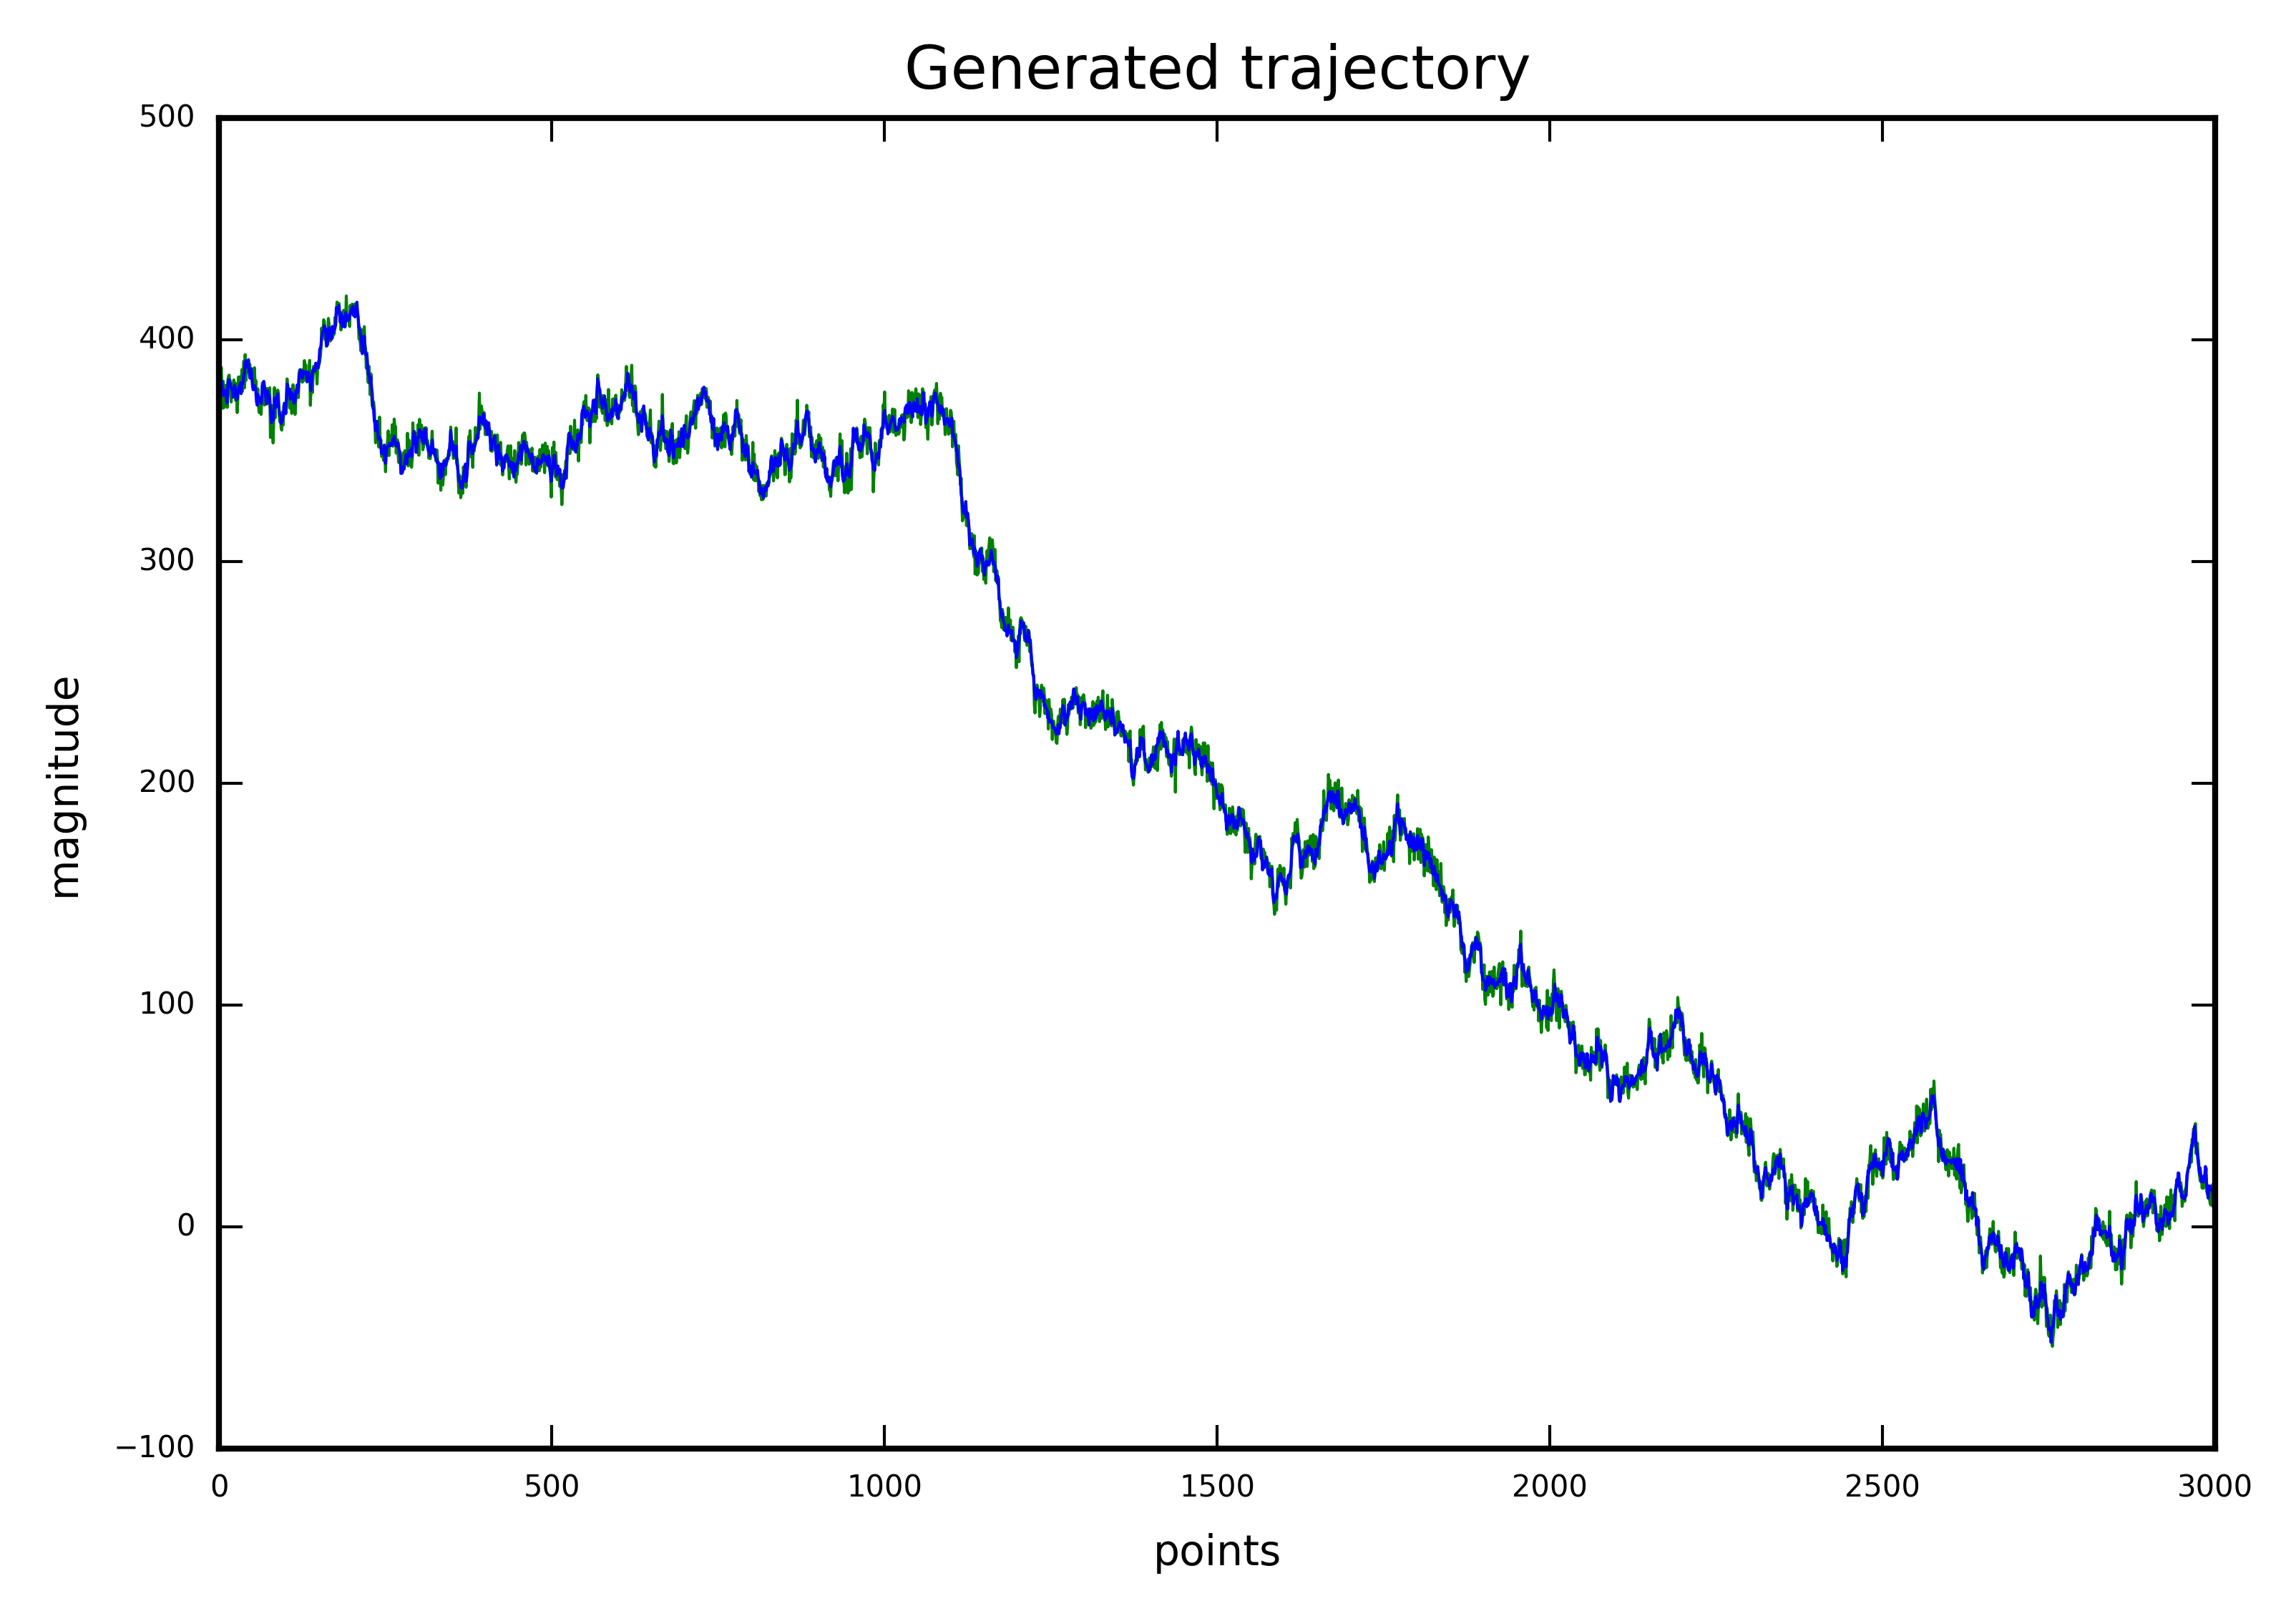

In [42]:
fig, ax = plt.subplots(1,1, figsize=(6,4), dpi = 600)
ax.set_title('Generated trajectory', fontsize = 10)
ax.plot(range(N),z,'g', label = 'measurements z', linewidth = 0.5 )
ax.plot(range(N),X,'b', label = 'true X', linewidth = 0.5 )
ax.set_xlabel('points', fontsize = 7)
ax.set_ylabel('magnitude', fontsize = 7)

## Counting $\sigma_w^2$  and $\sigma_n^2$

In [43]:
n1 = np.roll(n, 1) #shifts the array
n1[0] = 0
n2 = np.roll(n1,1)
n2[0] = 0
w1 = np.roll(w,1)
w1[0] = 0

In [44]:
v = w + n - n1
p = w + w1 - n -n2

In [45]:
Ev = np.average((v*v)[1:])
Ep = np.average((p*p)[2:])

In [46]:
sigma_w[0] = (Ep - Ev)**0.5
sigma_n[0] = ((2*Ev - Ep)/2)**0.5

In [47]:
print(r'experimental sigma_w_exp^2 = %.2f, in program sigma_w^2 = %.2f' 
      % tuple(sigma_w**2))

experimental sigma_w_exp^2 = 6.00, in program sigma_w^2 = 8.00


In [48]:
print(r'experimental sigma_n_exp^2 = %.2f, in program sigma_n^2 = %.2f' 
      % tuple(sigma_n**2))

experimental sigma_n_exp^2 = 16.73, in program sigma_n^2 = 16.00


## Determine optimal $\chi$ and $\alpha$

In [11]:
chi = (sigma_w/sigma_n)**2

In [12]:
alpha = 0.5*(-chi + (chi**2 + 4*chi)**0.5)

In [13]:
print(r'chi experimental = %.2f, chi in program = %.2f' % tuple(chi) )

chi experimental = 0.65, chi in program = 0.50


In [14]:
print(r'alpha experimental = %.2f, alpha in program = %.2f' % tuple(alpha) )

alpha experimental = 0.54, alpha in program = 0.50


# PART 2

In [21]:
N = 300
sigma_w = np.array([0,28])  #[0] refers to experimentally determined value,
                            #[1] to assigned by us
sigma_n = np.array([0,97])
w = normal(0, sigma_w[1], N)
n = normal(0, sigma_n[1], N)
window = np.tril(np.ones((N,N)))
X_0 = 10

In [22]:
X = np.ones_like(w)*10 + w.dot(window)
z = X + n

In [23]:
n1 = np.roll(n, 1)
n1[0] = 0
n2 = np.roll(n1,1)
n2[0] = 0
w1 = np.roll(w,1)
w1[0] = 0

In [24]:
v = w + n - n1
p = w + w1 - n -n2

In [25]:
Ev = np.average((v*v)[1:])
Ep = np.average((p*p)[2:])

In [26]:
sigma_w[0] = (Ep - Ev)**0.5 # here it might break due to Ev > Ep! but it's natural
sigma_n[0] = ((2*Ev - Ep)/2)**0.5

In [27]:
chi = (sigma_w/sigma_n)**2

In [28]:
alpha = 0.5*(-chi + (chi**2 + 4*chi)**0.5)

## Running mean

In [29]:
M = int(np.round((2-alpha)/alpha)[1])

In [30]:
running_window = np.ones(M)/M

In [31]:
X_meaned = np.convolve(X, running_window, mode='same')

## Exponential mean

In [32]:
X_quasi = np.zeros_like(X)
X_quasi[0] = X_0 + alpha[0]*(z[0] - X_0)

In [33]:
for i in range(1,N):
    X_quasi[i] = X_quasi[i-1] + alpha[0]*(z[i]-X_quasi[i-1])

### Plotting

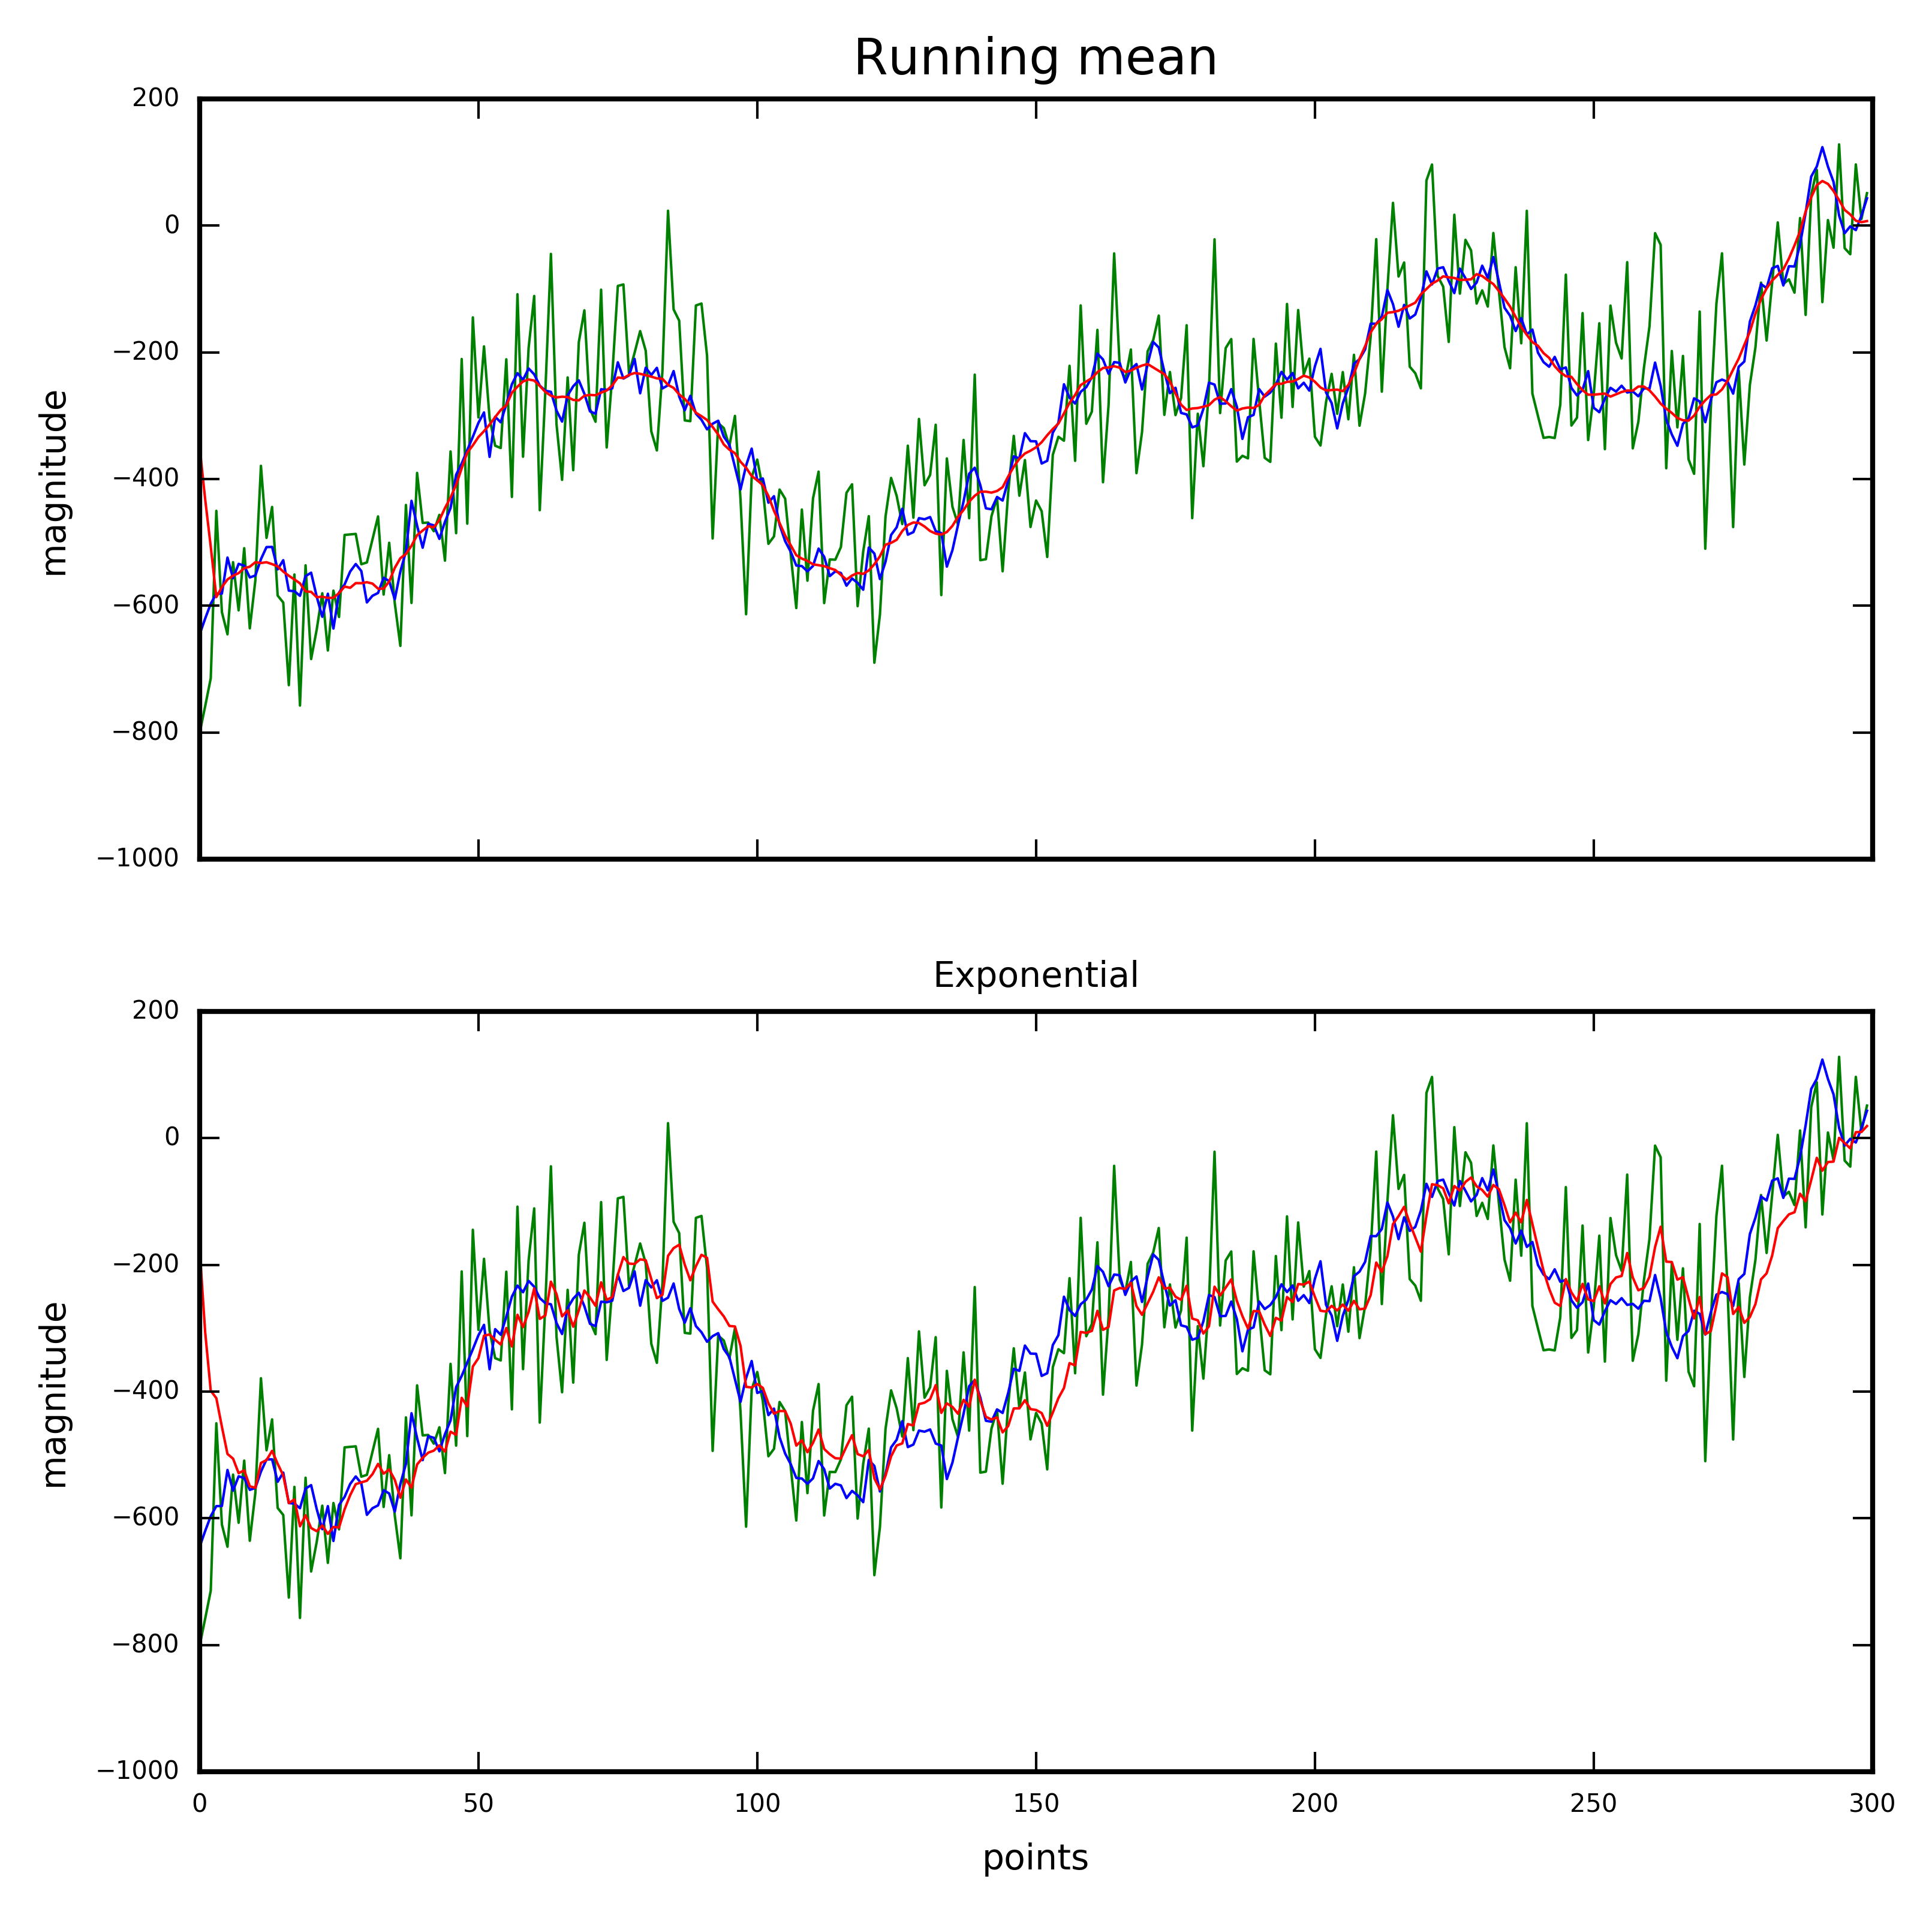

In [36]:
fig, ax = plt.subplots(2,1, figsize=(6,6), dpi = 600, sharex =True)
ax[0].set_title('Running mean', fontsize = 10)
ax[0].plot(range(N),z,'g', label = 'measurements z', linewidth = 0.5 )
ax[0].plot(range(N),X,'b', label = 'true X', linewidth = 0.5 )
ax[0].plot(range(N),X_meaned,'r', label = 'running mean method', linewidth = 0.5 )
#ax[0].set_xlabel('points', fontsize = 5)
ax[0].set_ylabel('magnitude', fontsize = 7)
ax[1].set_title('Exponential', fontsize = 7)
ax[1].plot(range(N),z,'g', label = 'measurements z', linewidth = 0.5 )
ax[1].plot(range(N),X,'b', label = 'true X', linewidth = 0.5 )
ax[1].plot(range(N),X_quasi,'r', label = 'exponential mean', linewidth = 0.5)
ax[1].set_xlabel('points', fontsize = 7)
ax[1].set_ylabel('magnitude', fontsize = 7)

### For this particular trajectory Running Mean method works better and Exponential method generates result closer to z than to X

### Exponential method in fact doesn't take into account this projectory details properly

### This should happen due to huge $\frac{\sigma_n}{\sigma_w} > 1$

### Today we learned how to use Exponential method and compared it to Running Mean method.